# Grad-Cam Application

### Importando os pacotes necessários

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# pacotes de visualização gráfica
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import urllib.request as url
# importando do repositório as funções do grad-cam
link = 'https://raw.githubusercontent.com/Alyssonmach/grad-cam-implementation/main/assets/grad_cam.py'
file_ = 'grad_cam.py'
url.urlretrieve(link, file_)

from grad_cam import get_img_array, make_gradcam_heatmap, save_and_display_gradcam

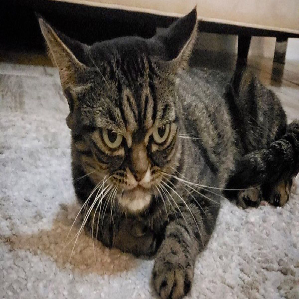

In [4]:
# importando o modelo
model_builder = keras.applications.InceptionV3(weights = 'imagenet')
# tamanho padrão das imagens do modelo
img_size = (299,299)
# importando os parâmetros de pré-processamento da rede
preprocess_input = keras.applications.inception_v3.preprocess_input
# importando a decodificação das classes alvo do modelo
decode_predictions = keras.applications.inception_v3.decode_predictions
# definindo a última camada da rede a ser considerada
last_conv_layer = 'mixed9_1'

# baixando e visualizando a imagem a ser utilizada com o Grad-Cam
img_path = keras.preprocessing.image.load_img('/content/happy-cat.jpg', target_size = img_size)

# plotando a imagem
display(img_path)

### Algoritmo Grad-Cam

40960/35363 [==================================] - 0s 0us/step
Classe prevista: [('n02123045', 'tabby', 10.563385)]


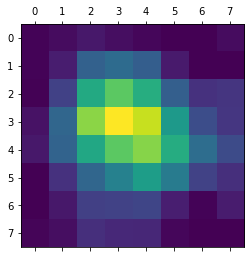

In [5]:
# preparando a imagem
img_array = preprocess_input(get_img_array(img_path, img_size))

# removendo a função de ativação da última camada
model_builder.layers[-1].activation = None

# obtendo a predição do modelo
preds = model_builder.predict(img_array)
print('Classe prevista:', decode_predictions(preds, top = 1)[0])

# gerando o mapa de ativação de classe (Grad-Cam)
heatmap = make_gradcam_heatmap(img_array, model_builder, last_conv_layer)

# visualizando o mapa de calor gerado pelo Grad-Cam
plt.matshow(heatmap)
plt.show()

### Mapa de ativação de classe

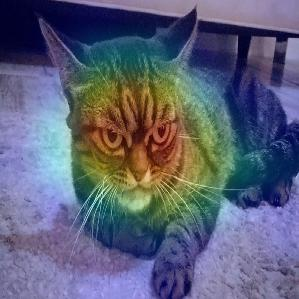

In [6]:
# resultado final do algoritmo Grad-Cam
heatmap = save_and_display_gradcam(img_path, heatmap)